# Consumer Behavior & Shopping Habits - Data Analysis
* To analyze consumer shopping behavior and identify demographic and behavioral patterns that impact high-value transactions and payment method preferences. This project aims to deliver insights that support retail marketing strategy, digital targeting, and product personalization using Python, R, Power BI, and SQL.

# Tools & Libraries Used
* Python
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Jupyter Notebook
* R

## 1. Import Libraries + Load Data

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [47]:
df = pd.read_csv('shopping_behavior.csv')

## 2. Data Exploration & Cleaning

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
# Checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
# Checking for null values
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [6]:
# Checking for white spaces in column names
print(df.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


In [7]:
# Find columns of type object (usually strings)
str_cols = df.select_dtypes(include = object)

# Check each value in those columns for leading/trailing spaces
for col in str_cols:
    if df[col].str.contains(r'^\s+|\s+$', regex=True).any():
        print(f"Whitespace found in column: {col}")

In [10]:
df['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [11]:
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [12]:
df['Location'].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [77]:
# Renaming the column name to Purchase Amount for easier analysis
df.rename(columns={'Purchase Amount (USD)': 'Purchase Amount'}, inplace=True)

In [14]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount,Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [15]:
df['Purchase Amount'].agg(['sum', 'max', 'min', 'mean'])

sum     233081.000000
max        100.000000
min         20.000000
mean        59.764359
Name: Purchase Amount, dtype: float64

In [16]:
df['Review Rating'].agg(['max', 'min'])

max    5.0
min    2.5
Name: Review Rating, dtype: float64

In [17]:
df['Age'].agg(['max', 'min'])

max    70
min    18
Name: Age, dtype: int64

In [18]:
df['Previous Purchases'].agg(['max', 'min'])

max    50
min     1
Name: Previous Purchases, dtype: int64

In [19]:
df['Payment Method'].unique()

array(['Venmo', 'Cash', 'Credit Card', 'PayPal', 'Bank Transfer',
       'Debit Card'], dtype=object)

In [20]:
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [21]:
# checking for duplicate rows and repeated customer IDs
[df.duplicated()]
df[df.duplicated(subset=['Customer ID'])]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount,Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


In [78]:
# Standardizing frequency values:
# "Every 3 Months" and "Quarterly" & "Fortnightly" and "Bi-Weekly" refer to the same purchase frequency.
# To ensure consistent categorization during analysis, we replace "Every 3 Months" with "Quarterly" and "Fortnightly" with "Bi-Weekly".

df['Frequency of Purchases'] = df['Frequency of Purchases'].replace('Fortnightly', 'Bi-Weekly')
df['Frequency of Purchases'] = df['Frequency of Purchases'].replace('Every 3 Months', 'Quarterly')

In [79]:
df['Frequency of Purchases'].unique()

array(['Bi-Weekly', 'Weekly', 'Annually', 'Quarterly', 'Monthly'],
      dtype=object)

### Insights:
* No null values were present in the entire dataset.
* Data types of all the columns were appropriate.
* No leading or trailing whitespaces were found in each column.
* This assured that the data is clean and can be used for analysis.
* Standardized inconsistent representations of the same category to remove redundancy and prevent misgrouping during analysis.
* No duplicate entries were found in the dataset.

In [24]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount,Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Bi-Weekly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Bi-Weekly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


## 3. Distribution & Categorization Analysis

Text(0.5, 1.0, 'Ratio of Gender')

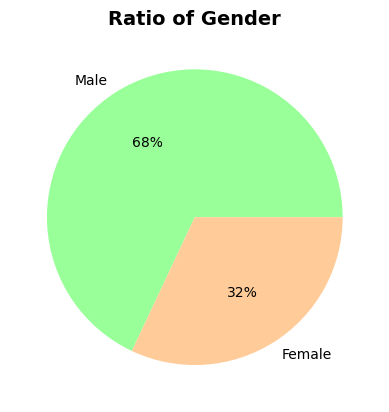

In [81]:
# Analyzing the ratio of Gender

df['Gender'].value_counts().plot(kind = 'pie',
                                autopct = '%.0f%%',
                                colors = ['#99ff99', '#ffcc99'],
                                ylabel = '')

plot.title('Ratio of Gender', fontsize=14, weight='bold')

### Insights:
* Out of the total customers, **68%** were males and **32%** were females.

Text(0.5, 1.0, 'Age Group Distribution')

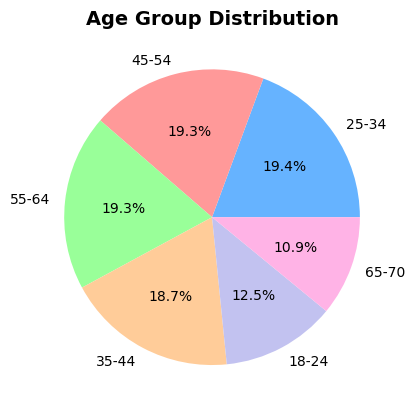

In [82]:
# Age categorization

df['Age Group'] = pd.cut(df['Age'], bins = [18, 25, 35, 45, 55, 65, 71], 
       labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'], right = False)

df['Age Group'].value_counts().plot(kind = 'pie',
                                    autopct = '%.1f%%',
                                    colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'],
                                    ylabel = '')
plot.title('Age Group Distribution', fontsize=14, weight='bold')

### Insights:
* The age groups **25–34**, **35–44**, **45–54** and **55–64** accounted for a total of **76.7%** of the total shopper base, indicating a strong purchasing presence across mid-life and pre-retirement consumers.
* The **18–24** age group represents **12.5%** of consumers, likely reflecting a demographic that is still in education or early in their careers, with limited disposable income.
* The **65–70** age group accounts for **10.9%** of shoppers, possibly due to more cautious spending habits, as many in this segment may rely solely on retirement savings or fixed incomes.

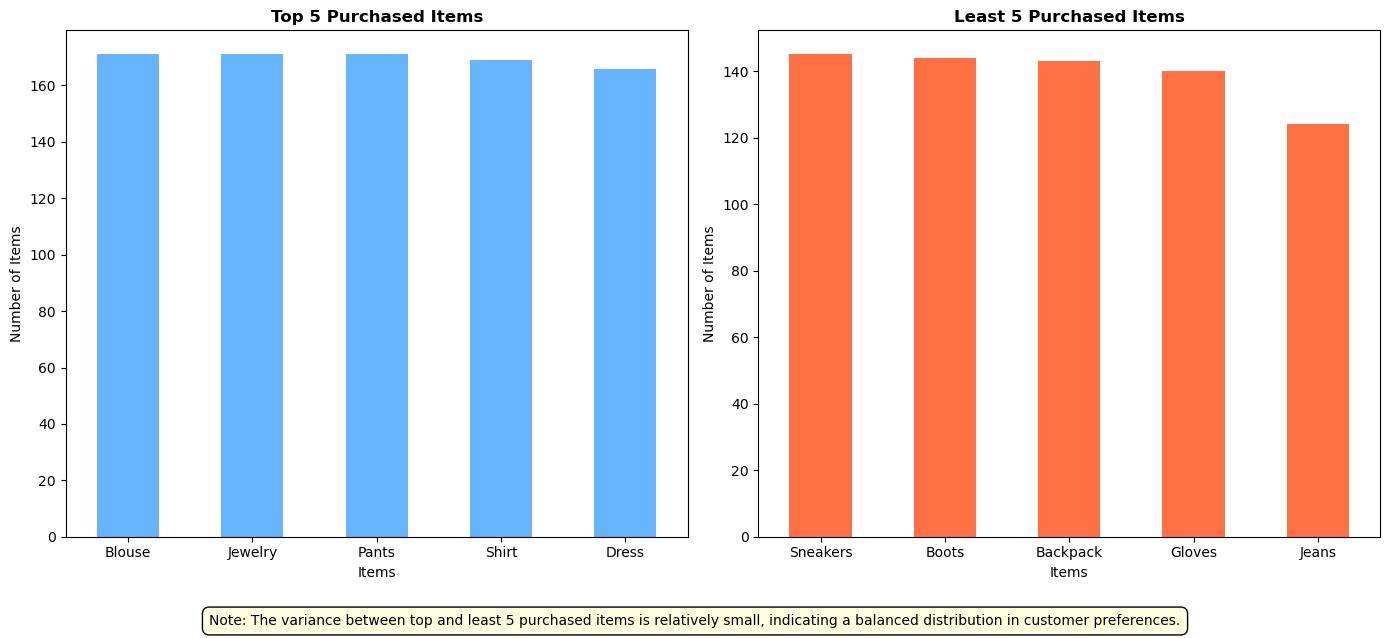

In [83]:
# Displaying top five and least five items purchased

top_items = df['Item Purchased'].value_counts().sort_values(ascending=False).head(5)
bottom_items = df['Item Purchased'].value_counts().sort_values(ascending=False).tail(5)

fig, axs = plot.subplots(1, 2, figsize=(14,6))

# Top 5 purchased items
top_items.plot(kind = 'bar', color='#66b3ff', ax=axs[0])
axs[0].set_title('Top 5 Purchased Items', fontsize=12, weight='bold')
axs[0].set_xlabel('Items')
axs[0].set_ylabel('Number of Items')
axs[0].tick_params(axis='x', rotation=0)

bottom_items.plot(kind = 'bar', color='#FF7043', ax=axs[1])
axs[1].set_title('Least 5 Purchased Items', fontsize=12, weight='bold')
axs[1].set_xlabel('Items')
axs[1].set_ylabel('Number of Items')
axs[1].tick_params(axis='x', rotation=0)

fig.text(0.5, -0.05,
         'Note: The variance between top and least 5 purchased items is relatively small, indicating a balanced distribution in customer preferences.',
         ha='center', fontsize=10, bbox=dict(facecolor='lightyellow', edgecolor='black', boxstyle='round,pad=0.5'))

plot.tight_layout()

### Insights:
* The Top 5 Purchased Items — **Blouse, Jewelry, Pants, Shirt and Dress** — all have very similar purchase counts, clustered around **165–170** units.
* The Least 5 Purchased Items — **Sneakers, Boots, Backpack, Gloves and Jeans** — are also fairly close in number, ranging from **125–145** units.
* The variance between the top five and bottom five purchased items appears relatively small, indicating a narrow distribution in product popularity. Despite the ranking difference, the actual number of units sold does not differ drastically, suggesting a balanced demand across the product range

In [84]:
top_variance = np.var(top_items)
low_variance = np.var(bottom_items)

print(f"Variance of top 5: {top_variance:.2f}")
print(f"Variance of least 5: {low_variance:.2f}")

Variance of top 5: 3.84
Variance of least 5: 60.56


Text(0.5, 1.0, 'Category Distribution')

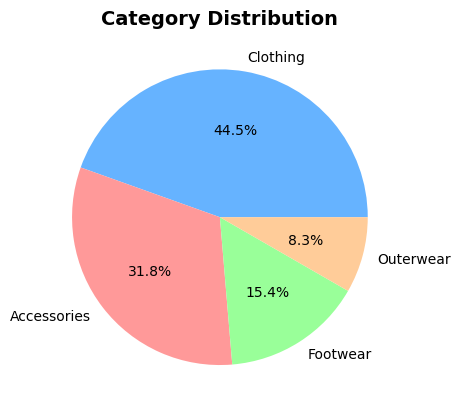

In [85]:
# Analyzing category distribution

df['Category'].value_counts().plot(kind = 'pie',
                                   autopct = '%.1f%%',
                                   colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99'],
                                   ylabel = '')
plot.title('Category Distribution', fontsize=14, weight='bold')

### Insights:
* Consumers demonstrated a significantly higher preference for clothing, with the category accounting for **44.5%** of all purchased items. In contrast, outerwear represented only **8.3%**, indicating relatively lower interest in that segment.

In [86]:
item_counts = df.groupby(['Category','Item Purchased']).size().reset_index(name='Number of Items')
item_counts

,Category,Item Purchased,Number of Items
0,Accessories,Backpack,143
1,Accessories,Belt,161
2,Accessories,Gloves,140
3,Accessories,Handbag,153
4,Accessories,Hat,154
5,Accessories,Jewelry,171
6,Accessories,Scarf,157
7,Accessories,Sunglasses,161
8,Clothing,Blouse,171
9,Clothing,Dress,166


Text(0.5, 1.05, 'Number of Items Purchased per Category')

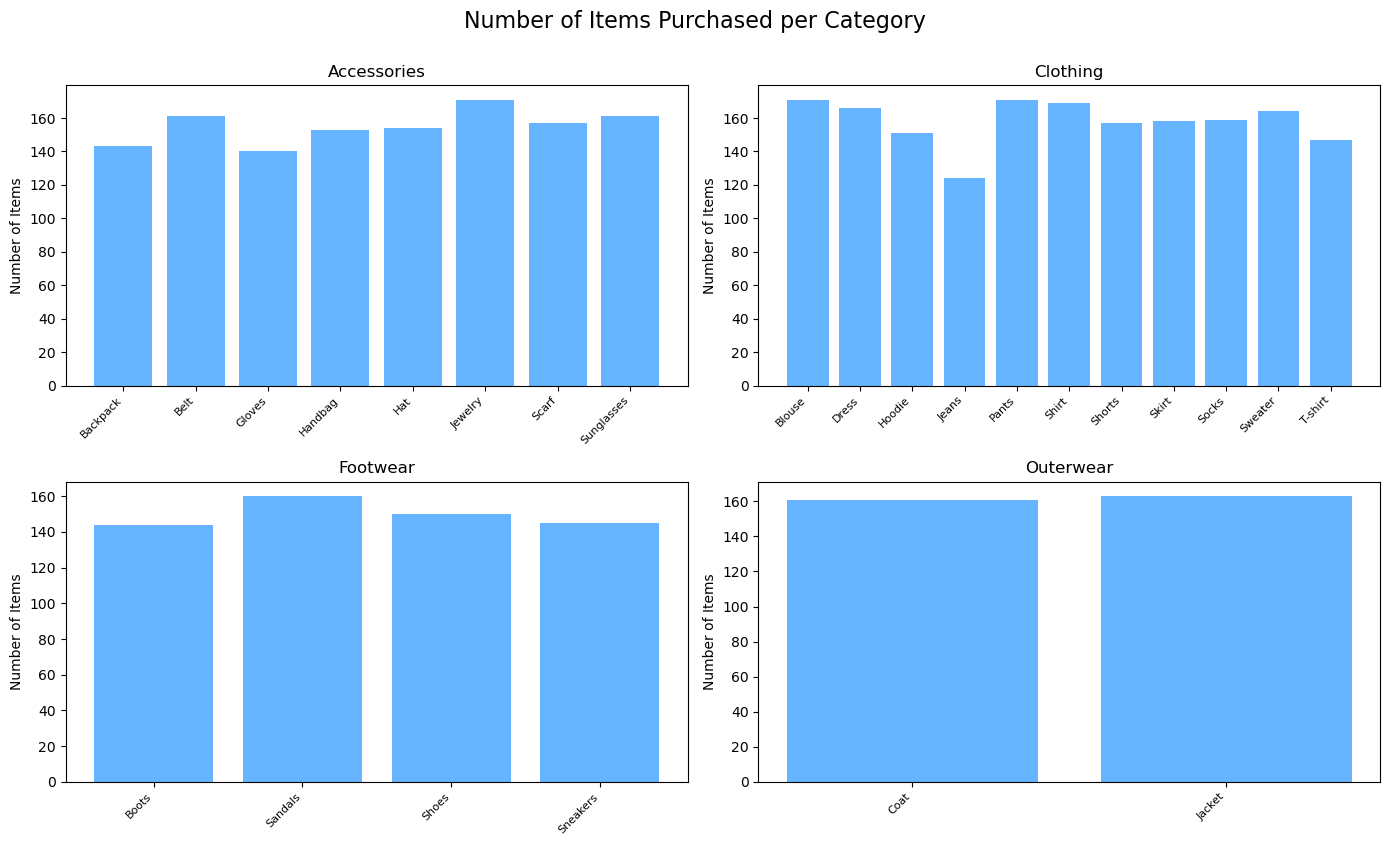

In [87]:
item_counts = df.groupby(['Category','Item Purchased']).size().reset_index(name='Number of Items')
categories = item_counts['Category'].unique()

fig, axes = plot.subplots(2, 2, figsize=(14, 8))
axes=axes.flatten() # converts the axes object from a 2D array to a 1D array so that you can easily loop over all subplots with a single index

for i, category in enumerate(categories):
    data = item_counts[item_counts['Category'] == category]
    axes[i].bar(data['Item Purchased'], data['Number of Items'], color='#66b3ff')
    axes[i].set_title(category)
    axes[i].set_xticks(range(len(data)))
    axes[i].set_xticklabels(data['Item Purchased'], fontsize=8, rotation=45, ha='right')
    axes[i].set_ylabel('Number of Items')

plot.tight_layout()
plot.suptitle('Number of Items Purchased per Category', fontsize=16, y=1.05)

### Insights:
* 

In [32]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount,Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Bi-Weekly,55-64
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Bi-Weekly,18-24
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,45-54
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-24
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,45-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,35-44
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,45-54
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,45-54
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,35-44


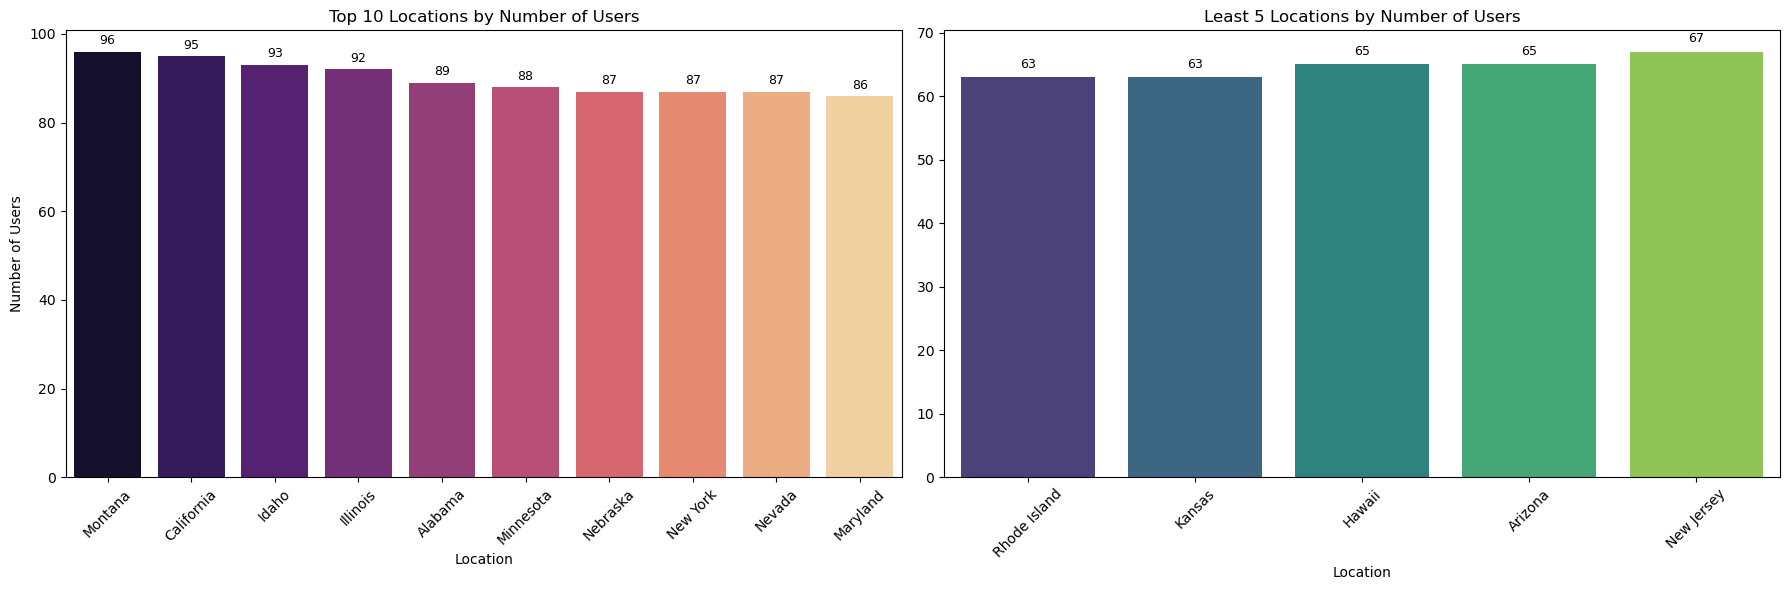

In [88]:
topten_locations = df['Location'].value_counts().sort_values(ascending=False).head(10)
topten_loc = topten_locations.to_frame(name='Number of Users').reset_index().rename(columns={'index': 'Location'})

bottomfive_locations = df['Location'].value_counts().sort_values().head(5)
bottomfive_loc = bottomfive_locations.to_frame(name='Number of Users').reset_index().rename(columns={'index': 'Location'})

fig, axes = plot.subplots(1, 2, figsize=(18, 6))

# Plot 1: Top 10 Locations
sns.barplot(x='Location', y='Number of Users', hue='Location', data=topten_loc, palette='magma', ax=axes[0])
axes[0].set_title('Top 10 Locations by Number of Users')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Number of Users')
axes[0].tick_params(axis='x', rotation=45)

# Annotate bars
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2, height + 1, int(height),
                 ha='center', va='bottom', fontsize=9)

# Plot 2: Bottom 5 Locations
sns.barplot(x='Location', y='Number of Users', hue='Location', data=bottomfive_loc, palette='viridis', ax=axes[1])
axes[1].set_title('Least 5 Locations by Number of Users')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)

# Annotate bars
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2, height + 1, int(height),
                 ha='center', va='bottom', fontsize=9)

plot.tight_layout()

### Insights:
* **Montana** recorded the highest number of consumers making purchases, whereas **Maryland** had the lowest among the top ten locations.
* **Rhode Island**, **Kansas**, **Hawaii**, **Arizona** and **New Jersey** showed the least number of users overall. This indicates potential regions for improvement, where marketing and sales teams can focus on understanding customer behavior, tailoring product offerings, and introducing location-specific promotions to boost engagement and sales.

In [89]:
df['Size'].nunique()

4

Text(0.5, 1.05, 'Number of Items Purchased per Size')

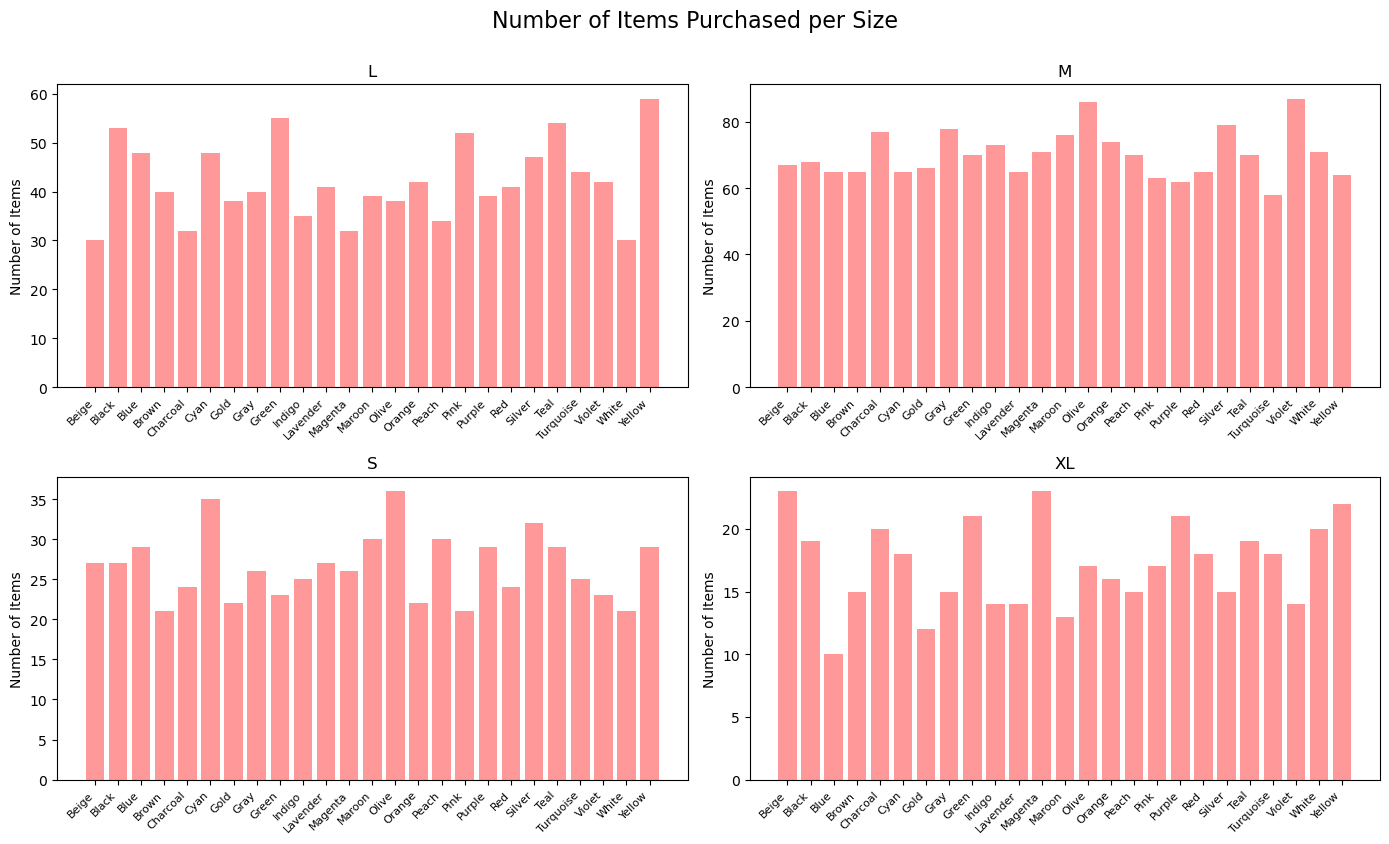

In [90]:
color_counts = df.groupby(['Size','Color']).size().reset_index(name='Number of Items')
color_counts

sizes = color_counts['Size'].unique()

fig, axes = plot.subplots(2, 2, figsize=(14, 8))
axes=axes.flatten() # converts the axes object from a 2D array to a 1D array so that you can easily loop over all subplots with a single index

for i, size in enumerate(sizes):
    data = color_counts[color_counts['Size'] == size]
    axes[i].bar(data['Color'], data['Number of Items'], color='#ff9999')
    axes[i].set_title(size)
    axes[i].set_xticks(range(len(data)))
    axes[i].set_xticklabels(data['Color'], fontsize=8, rotation=45, ha='right')
    axes[i].set_ylabel('Number of Items')

plot.tight_layout()
plot.suptitle('Number of Items Purchased per Size', fontsize=16, y=1.05)

### Insights:
* **M (Medium)** consistently has the highest number of purchases across most colors. Peaks noticeably in **Olive** and **Violet**, suggesting higher demand for these colors in medium size.
* **L (Large)** also shows strong purchasing trends, second to Medium. **Yellow** and **Green** stand out with higher item counts.
* **S (Small)** shows fewer purchases compared to M and L. Still maintains moderate demand for colors like **Cyan**, **Olive** and **Silver**.
* **XL (Extra Large)** shows the least number of items purchased overall. Most popular colors in XL appear to be **Beige**, **Magenta** and **Yellow**.
* Companies can use this insight to optimize inventory by stocking more of popular combinations like **M-Violet** or **L-Yellow** and consider promotional strategies for less purchased categories (e.g., XL sizes).



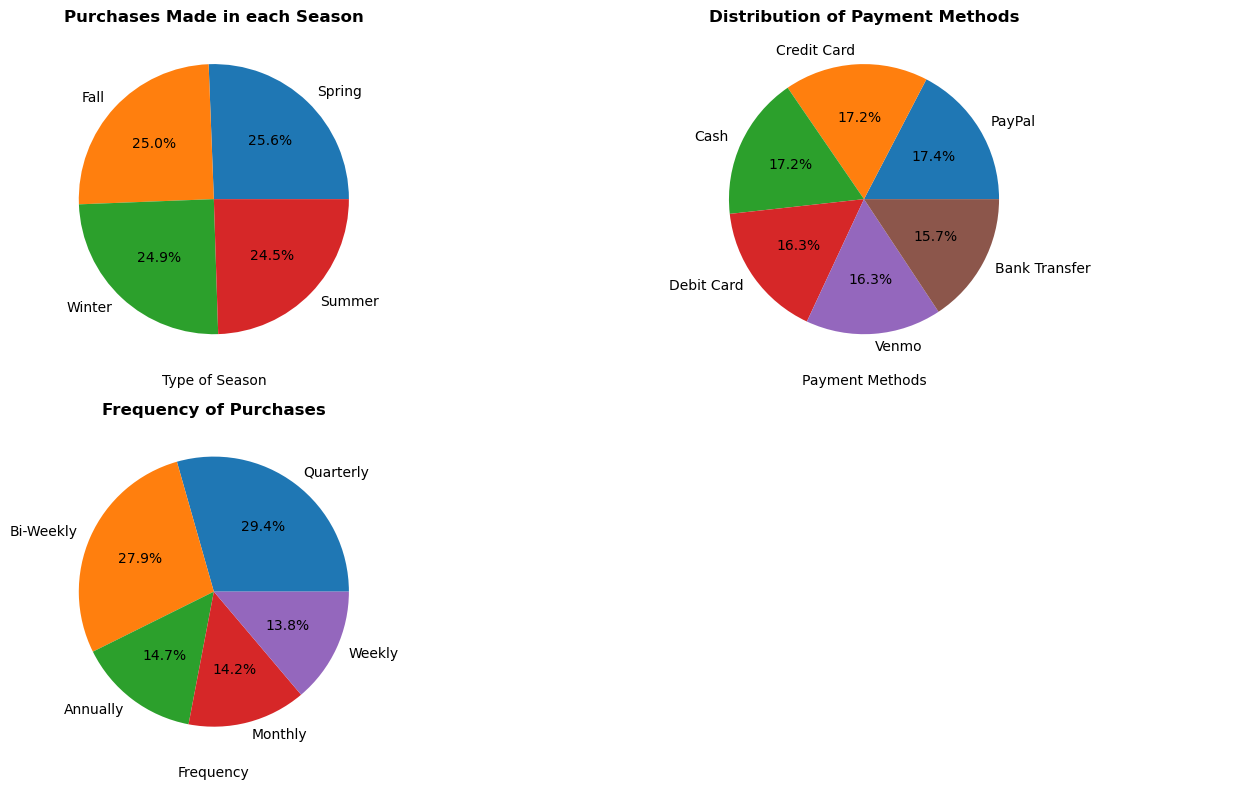

In [91]:
# Analyzing season, payment method and frequency of purchases

fig, axes = plot.subplots(2, 2, figsize=(14, 8))

axes = axes.flatten()

df['Season'].value_counts().plot(kind='pie', ax=axes[0], autopct='%0.1f%%')
axes[0].set_title('Purchases Made in each Season', fontsize=12, weight='bold')
axes[0].set_xlabel('Type of Season')
axes[0].set_ylabel('')

df['Payment Method'].value_counts().plot(kind='pie', ax=axes[1], autopct='%0.1f%%')
axes[1].set_title('Distribution of Payment Methods', fontsize=12, weight='bold')
axes[1].set_xlabel('Payment Methods')
axes[1].set_ylabel('')

df['Frequency of Purchases'].value_counts().plot(kind='pie', ax=axes[2], autopct='%0.1f%%')
axes[2].set_title('Frequency of Purchases', fontsize=12, weight='bold')
axes[2].set_xlabel('Frequency')
axes[2].set_ylabel('')

axes[3].axis('off') # hiding the fourth subplot

plot.tight_layout()

### Insights:
##### Consistent Purchases Across Seasons:
* Customer purchases remained steady throughout the year, with each season—Fall, Spring, Winter and Summer—accounting for roughly 24–25% of total sales. This suggests there is no particular seasonality in customer buying behavior, indicating year-round demand.
##### Preferred Payment Methods:
* There is only slight variation in preferred payment options. PayPal, Credit Card and Cash were the most commonly used methods, while Bank Transfer was the least preferred. Marketers can consider promoting PayPal as a fast and trusted option to further enhance customer convenience.
##### Purchase Frequency Patterns:
* About 29.4% of customers shop every 3 months, indicating a strong interest in exploring new trends and collections quarterly. Meanwhile, 13.8% buy weekly and 27.9% purchase bi-weekly, highlighting a highly engaged customer segment.
##### High-Frequency Buyers – An Opportunity:
* Customers who shop weekly or every two weeks may have higher purchasing power. They could also be resellers, boutique owners or fashion influencers who need a variety of styles frequently for business or content creation purposes.
##### Strategic Marketing Opportunities:
* To retain and reward these high-frequency shoppers, brands can introduce loyalty programs, exclusive discounts or referral campaigns. For influencers or creators, collaboration opportunities with personalized coupon codes can help reach wider audiences and drive additional sales through social media exposure.

In [92]:
df.groupby('Customer ID')['Previous Purchases'].sum().sort_values(ascending=False).head(40)

Customer ID
3262    50
634     50
2263    50
2265    50
125     50
666     50
3582    50
2100    50
314     50
3206    50
311     50
1851    50
1538    50
723     50
2289    50
2297    50
1522    50
102     50
3099    50
640     50
3257    50
858     50
2230    50
2117    50
456     50
3438    50
2167    50
3436    50
1640    50
366     50
79      50
1633    50
1624    50
3394    50
1620    50
1618    50
1617    50
522     50
2186    50
1953    50
Name: Previous Purchases, dtype: int64

In [93]:
df['Previous Purchases'].describe()

count    3900.000000
mean       25.351538
std        14.447125
min         1.000000
25%        13.000000
50%        25.000000
75%        38.000000
max        50.000000
Name: Previous Purchases, dtype: float64

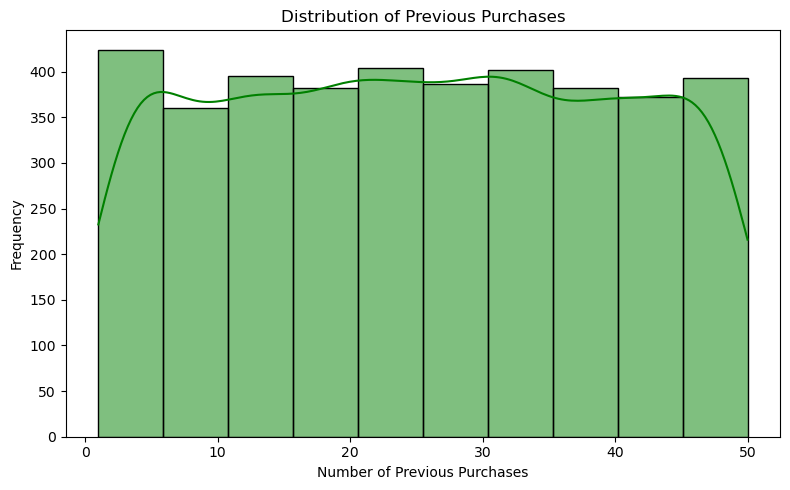

In [94]:
plot.figure(figsize=(8, 5))
sns.histplot(df['Previous Purchases'], bins=10, kde=True, color='green')
plot.title('Distribution of Previous Purchases')
plot.xlabel('Number of Previous Purchases')
plot.ylabel('Frequency')
plot.tight_layout()
plot.show()

### Insights:
* The bars are almost of similar height, which means customers are fairly evenly spread across the different levels of past purchases.
* Whether someone purchased just a few times or many times, the number of such customers is relatively balanced.
* There is no specific range where customer purchases are heavily concentrated.
* This suggests we have a healthy mix of customers, and there’s no single group dominating the sales. That’s good for business because it means we’re not overly dependent on one type of shopper.
* The green curve (KDE) confirms a smooth and fairly stable trend. It shows there is no extreme customer behavior, like everyone purchasing only once or all being loyal heavy buyers.



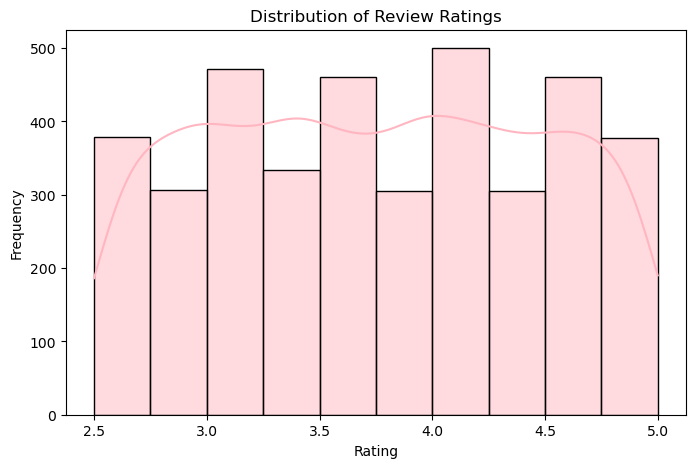

In [95]:
plot.figure(figsize=(8,5))
sns.histplot(df['Review Rating'], bins=10, kde=True, color='lightpink')
plot.title('Distribution of Review Ratings')
plot.xlabel('Rating')
plot.ylabel('Frequency')
plot.show()

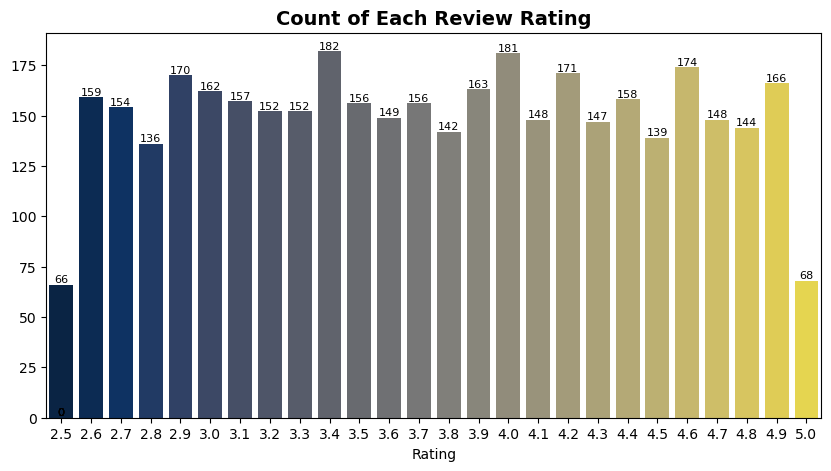

In [96]:
plot.figure(figsize=(10,5))
dx = sns.countplot(x='Review Rating', data=df, hue='Review Rating', palette='cividis')
plot.title('Count of Each Review Rating', fontsize=14, weight='bold')
plot.xlabel('Rating')
plot.ylabel('')
plot.legend().remove()

for p in dx.patches:
    height=p.get_height()
    dx.text(p.get_x()+p.get_width()/2, height+1, int(height), ha='center', fontsize=8)

### Insights:
* The KDE (Kernel Density Estimate) line is relatively evenly spread between ratings 2.75 and 4.75, suggesting that review ratings are fairly uniformly distributed within this range.
* Although the lowest and highest ratings (2.5 and 5.0) are not the most frequent, they still appear often enough to be relevant. This might imply that extreme satisfaction or dissatisfaction is less common, and most customers rate products/services moderately.
* The counts are comparable across the different rating ranges, indicating consistency in customer feedback.
* As per count plot, except for ratings (2.5 and 5.0), the customers who gave ratings between 2.6 to 4.9, lies in the range between 140 to 180.
* This plot shows that customer review ratings are quite evenly distributed between 2.75 and 4.75, with a slight lean towards moderate to good reviews (around 3.0 to 4.0). This tells us that most users are generally satisfied, but there's still room for improvement to shift ratings more consistently toward 4.5 and above.
* In addition to rating, feedback could have helped in analyzing the sentiments of the customers. This could have helped in developing strategies to improve the review ratings of the store.

In [97]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount,Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Sentiment,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Bi-Weekly,Negative,55-64
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Bi-Weekly,Negative,18-24
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Negative,45-54
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Negative,18-24
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Negative,45-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,Positive,35-44
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Positive,45-54
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,Negative,45-54
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,Negative,35-44


Text(0, 0.5, '')

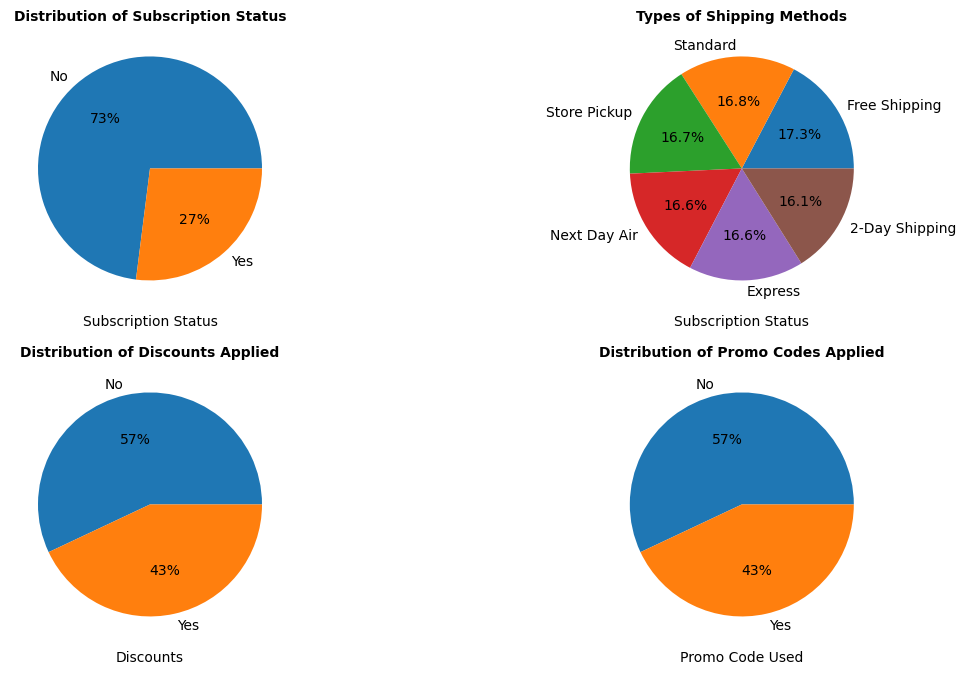

In [98]:
fig, axes = plot.subplots(2,2, figsize=(14,8))
axes = axes.flatten()

df['Subscription Status'].value_counts().plot(kind='pie', ax=axes[0], autopct='%0.0f%%')
axes[0].set_title('Distribution of Subscription Status', fontsize=10, weight='bold')
axes[0].set_xlabel('Subscription Status')
axes[0].set_ylabel('')

df['Shipping Type'].value_counts().plot(kind='pie', ax=axes[1], autopct='%0.1f%%')
axes[1].set_title('Types of Shipping Methods', fontsize=10, weight='bold')
axes[1].set_xlabel('Subscription Status')
axes[1].set_ylabel('')

df['Discount Applied'].value_counts().plot(kind='pie', ax=axes[2], autopct='%0.0f%%')
axes[2].set_title('Distribution of Discounts Applied', fontsize=10, weight='bold')
axes[2].set_xlabel('Discounts')
axes[2].set_ylabel('')

df['Promo Code Used'].value_counts().plot(kind='pie', ax=axes[3], autopct='%0.0f%%')
axes[3].set_title('Distribution of Promo Codes Applied', fontsize=10, weight='bold')
axes[3].set_xlabel('Promo Code Used')
axes[3].set_ylabel('')

### Insights:
* Around 73% of customers did not opt for a subscription, indicating a large potential user base that has yet to be converted. Stakeholders can explore strategies to showcase the value and benefits of subscribing such as exclusive offers, early access to products, or loyalty rewards to encourage adoption.
* For the 27% of customers who are subscribed, efforts can be focused on enhancing retention by offering personalized perks, subscription-only deals, or other value-added services to reinforce their loyalty and lifetime value.
* The data reveals a relatively even distribution across different shipping methods, with free shipping being the most preferred, chosen by 17.3% of customers. This highlights the continued importance of offering free shipping options as a competitive advantage, while also evaluating ways to optimize cost and delivery efficiency across other methods.
* Approximately 57% of customers did not apply any discounts, which may suggest either a lack of available discounts or a willingness to purchase regardless of promotional offers. This behavior highlights a segment of customers with strong purchasing intent, even without incentives. However, it also opens up an opportunity to experiment with targeted discounts to increase conversion without significantly affecting margins.
* Similarly, around 57% of consumers did not use promo codes, possibly due to unawareness, inaccessibility, or lack of available codes. Marketing teams can explore making promo codes more visible, easier to apply, or personalized, potentially increasing engagement and boosting sales, especially among price-sensitive shoppers.

### Calculating Customer Lifetime Values

In [99]:
df['CLV'] = df['Purchase Amount'] + (df['Previous Purchases']*df['Purchase Amount'].mean())
sorted_clv = df.groupby('Customer ID')['CLV'].sum().sort_values(ascending=False)
sorted_clv.head(10).to_frame().reset_index().rename(columns={'CLV': 'Customer Lifetime Value'})

,Customer ID,Customer Lifetime Value
0,456,3088.217949
1,993,3087.217949
2,1738,3086.217949
3,2485,3085.217949
4,2230,3085.217949
5,2446,3084.217949
6,1830,3084.217949
7,3582,3083.217949
8,2443,3083.217949
9,2265,3080.217949


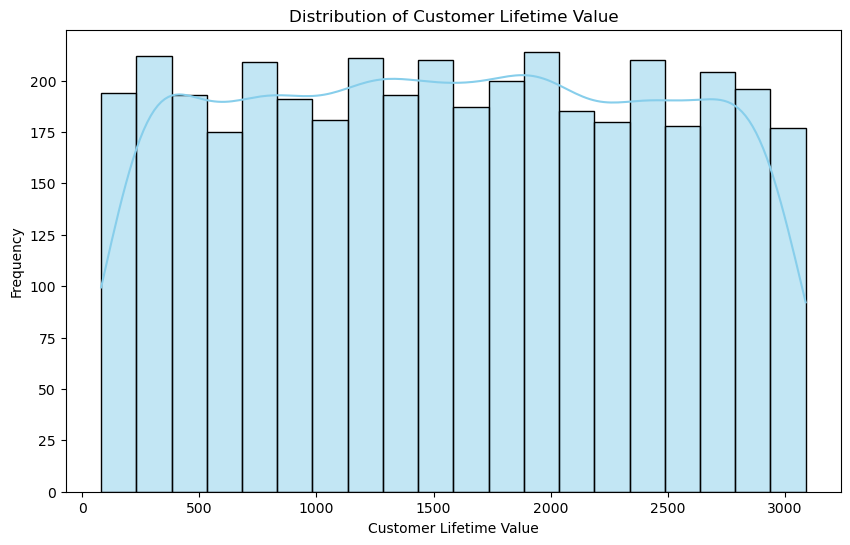

In [100]:
plot.figure(figsize=(10,6))
sns.histplot(df['CLV'], bins=20, kde=True, color='skyblue')
plot.title("Distribution of Customer Lifetime Value")
plot.xlabel("Customer Lifetime Value")
plot.ylabel("Frequency")
plot.show()

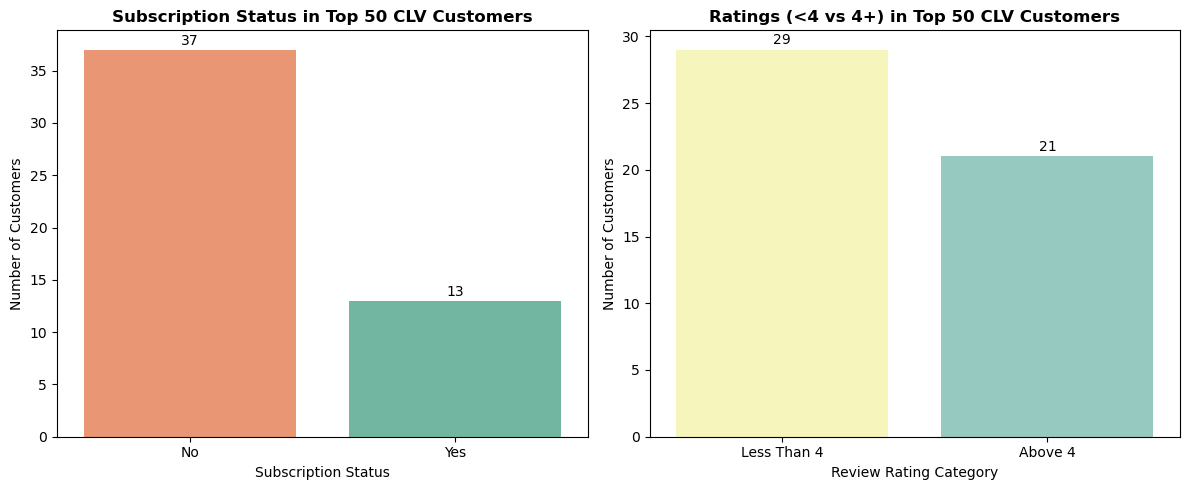

In [101]:
# Analyzing out of the top 50 customers with high CLV, how many of them opted for subscriptions
top50_clv = df.sort_values(by='CLV', ascending=False).head(50)
subscription_counts = top50_clv['Subscription Status'].value_counts()

# Analyzing out of the top 50 customers with high CLV, how many of them gave rating below 4
rating_clv = pd.cut(top50_clv['Review Rating'], bins=[0,4,5.1], labels=['Less Than 4', 'Above 4'], right=False)
rating_counts = rating_clv.value_counts()

fig, axes = plot.subplots(1, 2, figsize=(12, 5))

# Subscription status
sns.barplot(x=subscription_counts.index, y=subscription_counts.values, hue=subscription_counts.values, palette='Set2', ax=axes[0])
axes[0].set_title('Subscription Status in Top 50 CLV Customers', fontsize=12, weight='bold')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xlabel('Subscription Status')
axes[0].legend().remove()

# Add labels
for i, v in enumerate(subscription_counts.values):
    axes[0].text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10)

# Rating analysis
sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.values, palette='Set3', ax=axes[1])
axes[1].set_title('Ratings (<4 vs 4+) in Top 50 CLV Customers', fontsize=12, weight='bold')
axes[1].set_ylabel('Number of Customers')
axes[1].set_xlabel('Review Rating Category')
axes[1].legend().remove()

# Add labels
for i, v in enumerate(rating_counts.values):
    axes[1].text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10)

plot.tight_layout()

In [102]:
from IPython.display import display, Markdown

top50_clv_df = df.sort_values(by='CLV', ascending=False).head(50)
top50_total_clv = top50_clv_df['CLV'].sum()
top_all_clv = df['CLV'].sum()
percentage_clv = (top50_total_clv/top_all_clv)*100
percentage_customers = (50/df['Customer ID'].nunique())*100

display(Markdown(f"""
### Key Metric:
**Top 50 customers account for `{percentage_clv:.2f}%` of total CLV**  
They represent only `{percentage_customers:.2f}%` of the customer base.
"""))


### Key Metric:
**Top 50 customers account for `2.50%` of total CLV**  
They represent only `1.28%` of the customer base.


### Insights:
* We calculated Customer Lifetime Value (CLV) for all customers using their purchase amount and past buying behavior. This helped us identify the top 50 customers who contribute the most to long-term revenue.
* These 50 customers spend more and buy more often than the average customer. However, they represent only 2.5% of total revenue and just 1.28% of our total customer base, meaning a small group is driving a big part of our business.
* Out of these top 50, only 13 customers have subscribed to our platform. This is a missed opportunity. Stakeholder can explore ways to encourage the remaining 37 customers to subscribe by offering special benefits or personalized communication.
* Additionally, 29 out of these 50 customers gave a review rating below 4. This is a concern, as these are the most valuable customers. It's important for the Customer Relationship team to reach out, understand their concerns and work on improving their experience.
* Stakeholders can also focus on strengthening relationships with customers whose CLV is just below the top segment, as they have strong potential to become high-value customers with the right engagement and support.



### Sentiment Analysis by Review Rating

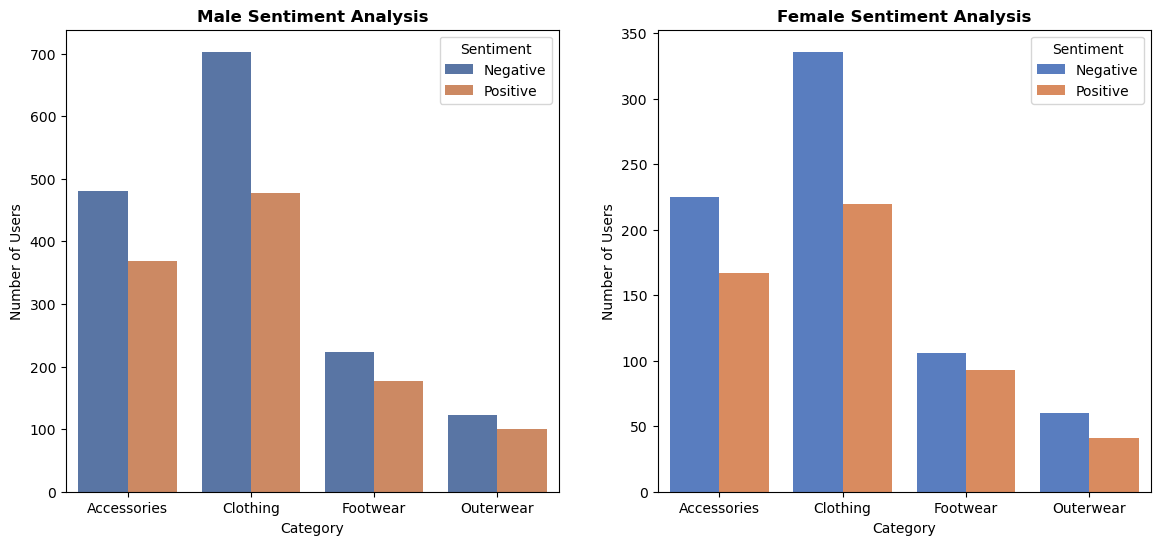

In [103]:
# Group ratings into positive, neutral, negative sentiment and analyze patterns by item category or gender
# Assumption:
# As per my opinion, any ratings below 4 are considered as 'Negative' sentiment.
# For a customer-centric organization, any rating below 4 indicates some level of dissatisfaction.
# This threshold ensures that even moderate issues are flagged for improvement, enhancing overall customer experience.

def sentiment(rating):
    if rating >= 4:
        return 'Positive'
    else:
        return 'Negative'
df['Sentiment'] = df['Review Rating'].apply(sentiment)

sentiments = df.groupby(['Gender','Category','Sentiment'])['Customer ID'].size().reset_index(name='Number of Users')
males_sentiments = sentiments[sentiments['Gender'] == 'Male']
female_sentiments = sentiments[sentiments['Gender'] == 'Female']

fig, axes = plot.subplots(1,2,figsize=(14,6))

sns.barplot(x='Category', y='Number of Users', hue='Sentiment', data=males_sentiments, ax=axes[0], palette='deep')
axes[0].set_title('Male Sentiment Analysis', fontsize=12, weight='bold')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Number of Users')
axes[0].tick_params(axis='x', rotation=0)

sns.barplot(x='Category', y='Number of Users', hue='Sentiment', data=female_sentiments, ax=axes[1], palette='muted')
axes[1].set_title('Female Sentiment Analysis', fontsize=12, weight='bold')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Number of Users')
axes[1].tick_params(axis='x', rotation=0)

### Insights:
* Majority of users gave ratings below 4 (Negative sentiment) across all categories for both male and female customers.
* Clothing category has the highest number of total users and also the highest number of negative ratings for both males and females. This could indicate issues related to sizing, fabric quality, or expectations not being met.
* Accessories come second in terms of user interaction, but again, negative reviews outweigh positive ones significantly for both genders.
* Footwear and Outerwear have relatively fewer users, but the sentiment pattern remains the same: more users gave ratings below 4.

### Actionable Suggestions:
* Customer experience needs improvement as large portion of your user base is not satisfied, especially in the Clothing and Accessories segments.
* Need to conduct product quality checks and gather qualitative feedback (maybe via surveys or calls) from customers who gave low ratings.
* Consider offering personalized offers or follow-ups to those who left negative feedback to regain trust.
* Improve product description, imagery and sizing guides to set clearer expectations before purchase.
* Since male customers account for higher volume of ratings, stakeholders can try tailoring loyalty programs or satisfaction follow-ups with a slight focus on them.
* Female sentiment also shows dissatisfaction, so targeted campaigns to understand and improve their experience can enhance long-term retention.

In [104]:
# Exporting the cleaned CSV file for analysis in SQL and R
df.to_csv('CleanedCustomerBehavior.csv', index=False)

In [105]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount,Location,Size,Color,Season,...,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Sentiment,Age Group,CLV
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Express,Yes,Yes,14,Venmo,Bi-Weekly,Negative,55-64,889.701026
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Express,Yes,Yes,2,Cash,Bi-Weekly,Negative,18-24,183.528718
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Negative,45-54,1447.580256
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Negative,18-24,3018.453590
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Negative,45-54,1901.695128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,No,2-Day Shipping,No,No,32,Venmo,Weekly,Positive,35-44,1940.459487
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Positive,45-54,2499.338718
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,No,Standard,No,No,24,Venmo,Quarterly,Negative,45-54,1467.344615
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,No,Express,No,No,24,Venmo,Weekly,Negative,35-44,1511.344615


### Promo Code Effectiveness Analysis
#### SQL Query

SELECT `Promo Code Used`, AVG(`Purchase Amount`) AS AverageAmount  
FROM cleanedcustomerbehavior  
GROUP BY `Promo Code Used`  

Result:   

Promo Code Used, AverageAmount  
'Yes', '59.2791'  
'No', '60.1305'  

### Presenting a list of high spenders
#### SQL Query

WITH customer_stats AS (  
    SELECT   
        `Customer ID`,  
        `Purchase Amount`,  
        AVG(`Purchase Amount`) OVER() AS Overall_Average,  
        AVG(`Purchase Amount`) OVER(PARTITION BY `Customer ID`) AS Customer_Average,  
        SUM(`Purchase Amount`) OVER(PARTITION BY `Customer ID`) AS Total_Spend  
    FROM cleanedcustomerbehavior  
),  
filtered_customers AS (  
	SELECT   
		DISTINCT `Customer ID`,  
        Customer_Average,  
        Total_Spend  
        FROM customer_stats  
        WHERE Customer_Average > Overall_Average  
),  
ranked_customers AS (  
		SELECT *,  
			DENSE_RANK() OVER (ORDER BY Total_Spend DESC) AS Spending_Rank  
		FROM filtered_customers  
)  
SELECT * FROM ranked_customers  
ORDER BY Spending_Rank  

In [118]:
df1 = pd.read_csv('HighSpendersList.csv')
df1

,Customer ID,Customer_Average,Total_Spend,Spending_Rank
0,43,100.0,100,1
1,96,100.0,100,1
2,194,100.0,100,1
3,205,100.0,100,1
4,244,100.0,100,1
...,...,...,...,...
1958,3683,60.0,60,41
1959,3722,60.0,60,41
1960,3774,60.0,60,41
1961,3779,60.0,60,41


### Correlation Using All Factors

Text(0.5, 1.0, 'Correlation Map')

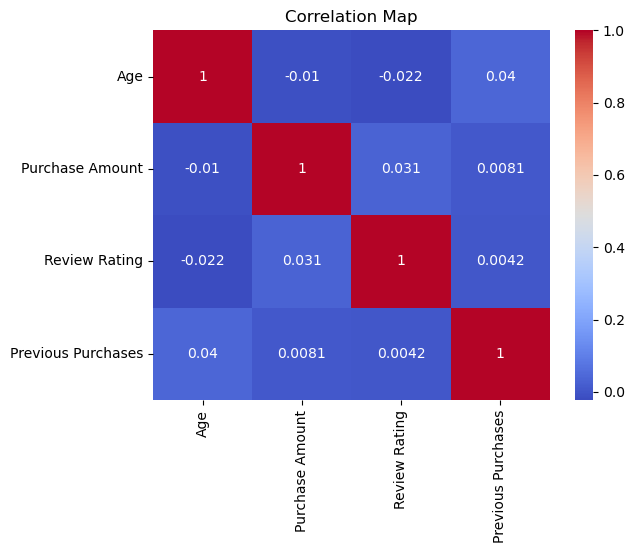

In [120]:
numeric_df = df.select_dtypes(include='number')
heatmap_df = numeric_df.drop(columns = ['Customer ID', 'CLV'])
sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm')
plot.title('Correlation Map')

### Insights:
* The correlation map shows weak correlations between each variable.
* Age vs Purchase Amount: -0.01 (No meaningful correlation).
* Review Rating vs Purchase Amount: 0.031 (Essentially no relationship).
* Previous Purchases vs Purchase Amount: 0.0081 (No correlation).

### Conclusion:
* The dataset is clean, and analysis reveals that males (68%) and age group 25–64 dominate purchasing activity.
* Clothing is the highest-performing category, with consistent demand for sizes M and L and vibrant colors.
* Most customers shop quarterly or bi-weekly, showing consistent engagement, with PayPal as a leading payment method.
* Only 13 of the top 50 customers are subscribed, and over half gave low review ratings, signaling critical retention risks.
* 57% of customers don’t use promo codes, indicating potential to drive higher sales through smarter promotions.
* Customer satisfaction needs attention: majority rated under 4 stars across categories, especially in clothing and accessories.
* Certain geographies (e.g., Hawaii, Rhode Island) remain untapped and present opportunities for regional expansion.

### Recommendations to Stakeholders:
* **Subscription Focus**: Launch targeted campaigns for high-value, non-subscribed users to boost long-term retention. Promoting the benefit of subscriptions more clearly to non-subscribers would be recommended.
* **Customer Recovery Plan**: Prioritize engagement with low-rating high-value customers through personalized outreach.
* **Product & Experience Enhancement**: Improve quality checks, visuals and sizing guidance to boost review scores.
* **Promotions Strategy**: Increase visibility of promo codes and tailor them to customer segments for better adoption.
* **Loyalty & Engagement**: Introduce tier-based loyalty programs for frequent buyers and exclusive perks for top spenders.
* **Geographic Expansion**: Tailor marketing efforts to low-performing regions like Kansas, Rhode Island and Hawaii.